# Libraries Required

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, silhouette_score


# Load & Explore the Dataset

In [4]:
# Load dataset
df = pd.read_csv("WildfirePrevention.csv")

# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 29 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   country                                                             288 non-null    object 
 1   subnational1                                                        288 non-null    object 
 2   umd_tree_cover_density__threshold                                   288 non-null    int64  
 3   umd_tree_cover_extent_2000__ha                                      288 non-null    int64  
 4   whrc_aboveground_biomass_stock_2000__Mg                             288 non-null    int64  
 5   avg_whrc_aboveground_biomass_2000_Mg_ha-1                           288 non-null    int64  
 6   gfw_gross_emissions_co2e_all_gases__Mg_yr-1                         108 non-null    float64
 7   gfw_gross_cumulat

In [5]:
# Check missing values
print(df.isnull().sum())

# Drop irrelevant columns (modify based on dataset)
df = df.drop(columns=['country', 'subnational1'])

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

country                                                                 0
subnational1                                                            0
umd_tree_cover_density__threshold                                       0
umd_tree_cover_extent_2000__ha                                          0
whrc_aboveground_biomass_stock_2000__Mg                                 0
avg_whrc_aboveground_biomass_2000_Mg_ha-1                               0
gfw_gross_emissions_co2e_all_gases__Mg_yr-1                           180
gfw_gross_cumulative_aboveground_belowground_co2_removals__Mg_yr-1    180
gfw_net_flux_co2e__Mg_yr-1                                            180
gfw_gross_emissions_co2e_all_gases_2001__Mg                           180
gfw_gross_emissions_co2e_all_gases_2002__Mg                           180
gfw_gross_emissions_co2e_all_gases_2003__Mg                           180
gfw_gross_emissions_co2e_all_gases_2004__Mg                           180
gfw_gross_emissions_co2e_all_gases_200

# Data Preprocessing & Feature Engineering

In [6]:
# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)


# Exploratory Data Analysis (EDA)

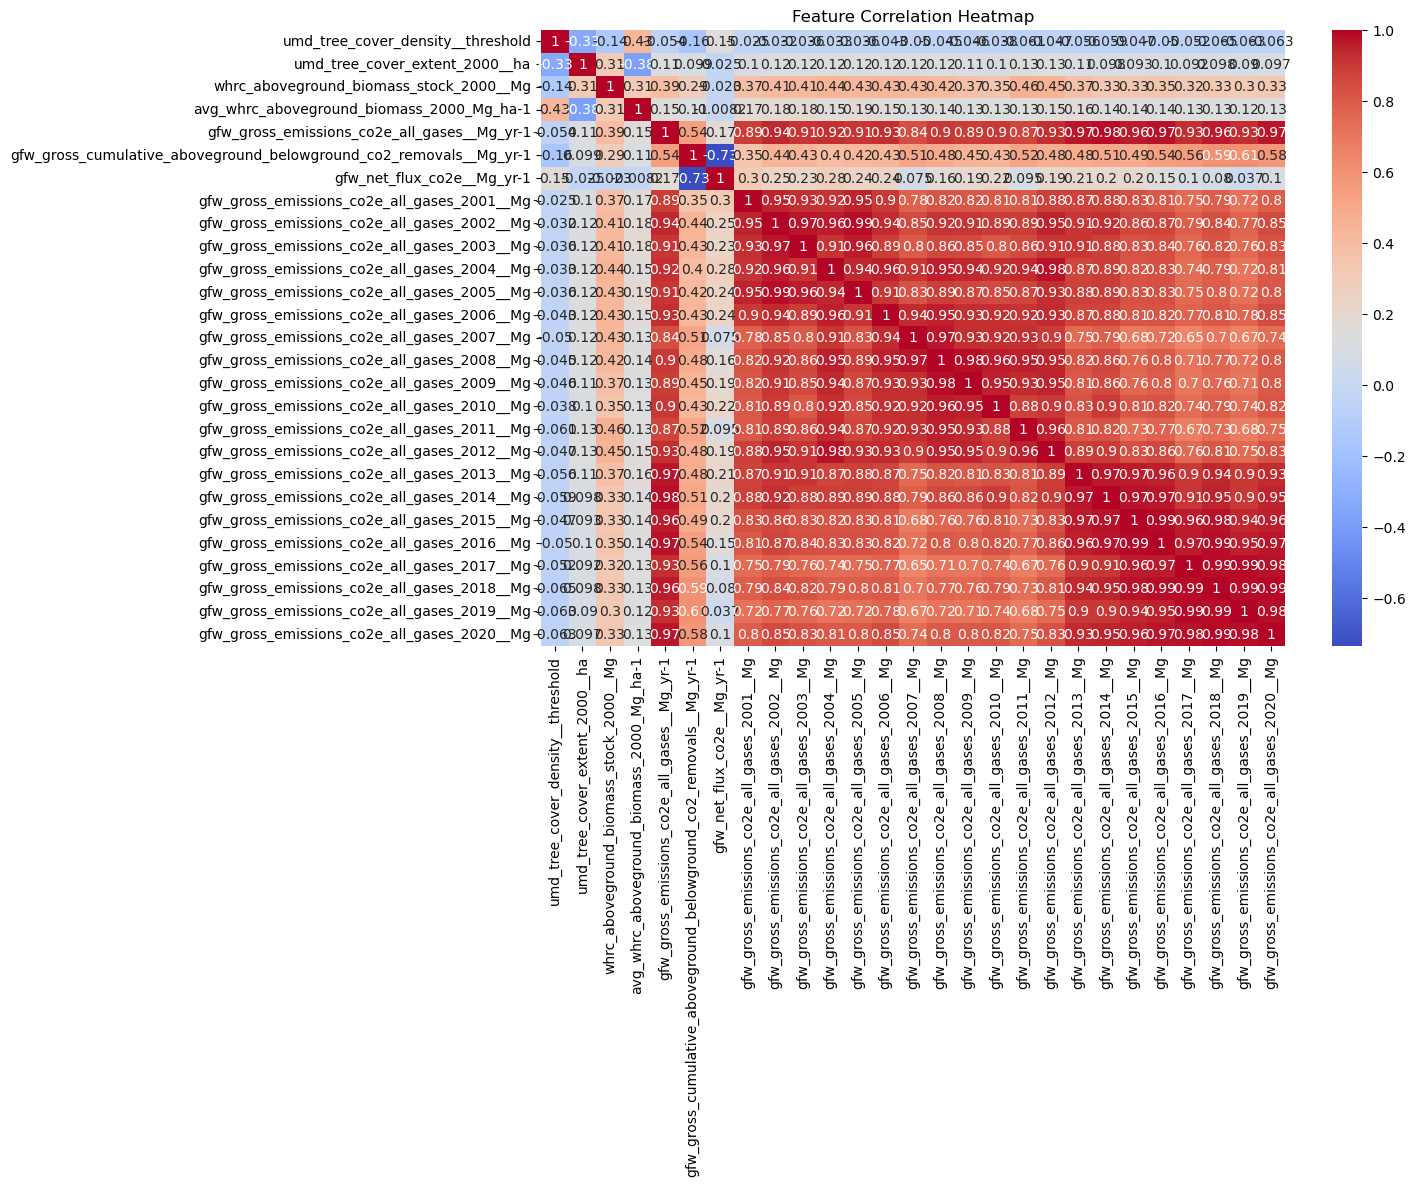

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Apply Dimensionality Reduction (PCA)

In [11]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.69906722 0.07410608]


# Clustering with K-Means

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

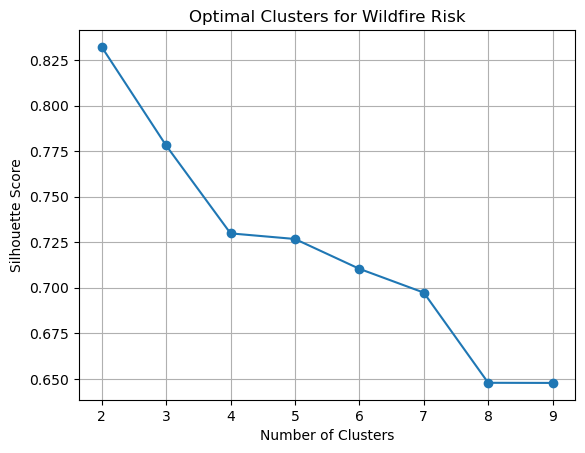

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


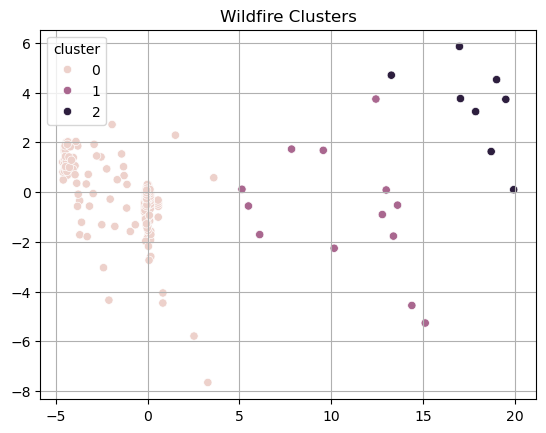

In [14]:
# Optimal clusters using silhouette score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Clusters for Wildfire Risk")
plt.grid(True)
plt.show()

# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled["cluster"] = kmeans.fit_predict(df_pca)

sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_scaled["cluster"])
plt.title("Wildfire Clusters")
plt.grid(True)
plt.show()


# Regression Model for CO₂ Emissions Prediction

Mean Squared Error: 5.12731460512224e-14


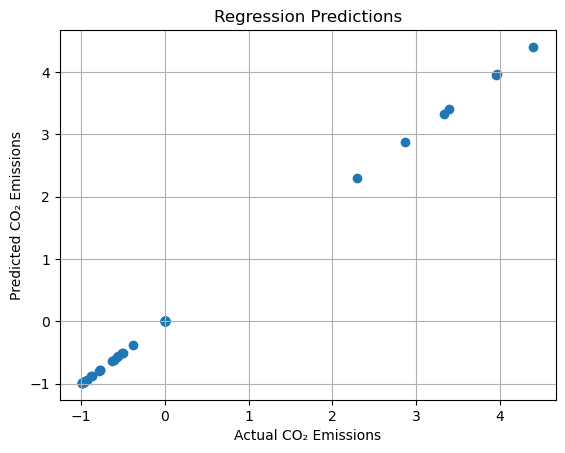

In [16]:
X = df_scaled.drop(columns=["gfw_gross_emissions_co2e_all_gases__Mg_yr-1"])
y = df_scaled["gfw_gross_emissions_co2e_all_gases__Mg_yr-1"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Regression Predictions")
plt.grid(True)
plt.show()


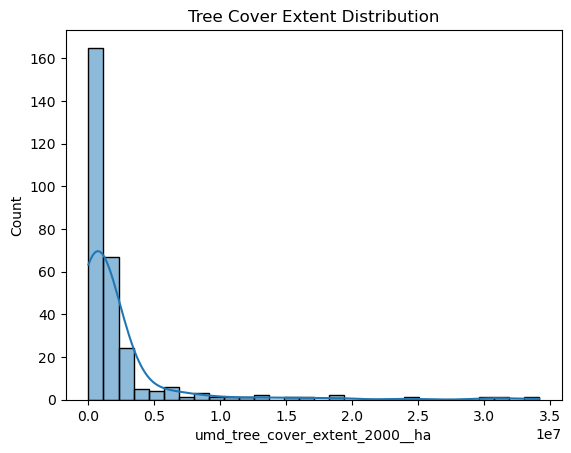

In [20]:
# Histogram of tree cover extent
sns.histplot(df['umd_tree_cover_extent_2000__ha'], bins=30, kde=True)
plt.title("Tree Cover Extent Distribution")
plt.show()

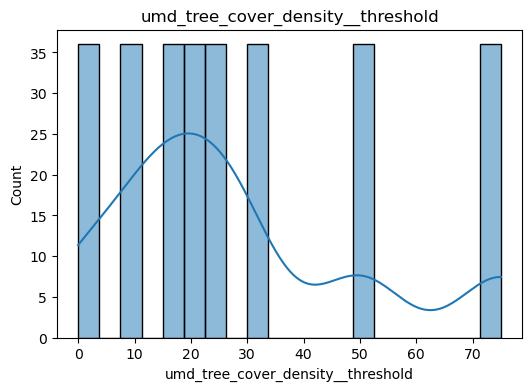

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(df['umd_tree_cover_density__threshold'], bins=20, kde=True)
plt.title("umd_tree_cover_density__threshold")
plt.show()

# Classification Model for Wildfire Risk Prediction

In [17]:
# Define target variable as wildfire risk based on emissions threshold
df_scaled["wildfire_risk"] = np.where(df_scaled["gfw_gross_emissions_co2e_all_gases__Mg_yr-1"] > df_scaled["gfw_gross_emissions_co2e_all_gases__Mg_yr-1"].median(), 1, 0)

X_class = df_scaled.drop(columns=["wildfire_risk"])
y_class = df_scaled["wildfire_risk"]

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00         7

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

Decision Tree Accuracy: 0.9827586206896551
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.88      1.00      0.93         7

    accuracy                           0.98        58
   macro avg       0.94      0.99      0.96        58
weighted avg       0.98      0.98      0.98        58

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00         7

    accuracy                           1.00        58
   macro avg       1.00

# Visualizing High-Risk Wildfire Areas

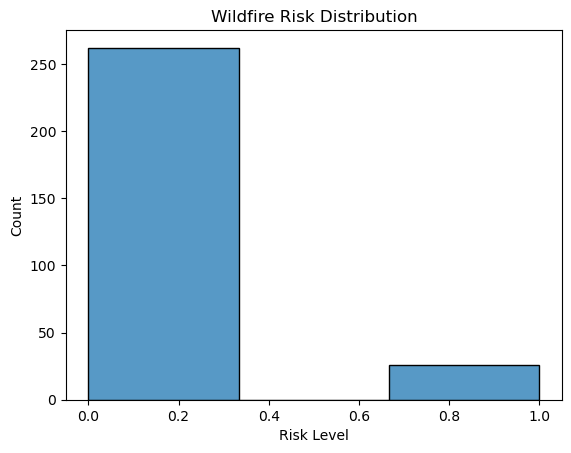

In [18]:
sns.histplot(df_scaled["wildfire_risk"], bins=3)
plt.title("Wildfire Risk Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()
